## SI 507 Final Project
#### Elizabeth Choi (eychoi)

In [1]:
# Spotify API
# TOP 100 Songs of 2022 (Best Hit Music Playlist) (100 songs) https://open.spotify.com/playlist/1EVE9kOZ2i4171hNdvWVhU

import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import secret

client_credentials_manager = SpotifyClientCredentials(secret.client_id, secret.client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

class SpotifyAPI(object):
    client_id = secret.client_id
    client_secret = secret.client_secret
    playlist_id = secret.playlist_id

    def getTrackID(playlist_id):
        id = []
        play_list = sp.playlist(playlist_id)
        for item in play_list['tracks']['items']:
            track = item['track']
            id.append(track['id'])
        return id

    def getartistid(id):
        meta = sp.track(id)
        artist_id = meta['album']['artists'][0]['id']
        id = [artist_id]
        return id

    def getTrackFeatures(id):
        meta = sp.track(id)
        features = sp.audio_features(id)

        song_name = meta['name']
        album = meta['album']['name']
        artists = meta['album']['artists'][0]['name']
        release_date = meta['album']['release_date']
        length = meta['duration_ms']
        popularity = meta['popularity']

        acousticness = features[0]['acousticness']
        danceability = features[0]['danceability']
        energy = features[0]['energy']
        key = features[0]['key']
        mode = features[0]['mode']
        valence = features[0]['valence']
        instrumentalness = features[0]['instrumentalness']
        liveness = features[0]['liveness']
        loudness = features[0]['loudness']
        speechiness = features[0]['speechiness']
        tempo = features[0]['tempo']
        time_signature = features[0]['time_signature']

        track = [song_name, album, artists, release_date, length, popularity, acousticness, danceability, energy, key, mode, valence, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
        return track

In [2]:
#Caching for Spotify

import json

def persist_to_file_1(file_name):
    def decorator(original_func):
        try:
            cache = json.load(open(file_name, 'r'))
        except (IOError, ValueError):
            cache = {}
        def new_func(param):
            if param not in cache:
                cache[(param)] = original_func(param)
                json.dump(cache, open(file_name, 'w'), indent = 4)
                return cache[param]
            return cache[param]
        return new_func
    return decorator

@persist_to_file_1('spotifycache.json')
def get_info(playlist_id):
    a = SpotifyAPI.getTrackID(playlist_id)
    artist_id = []
    for i in range(len(a)):
        x = SpotifyAPI.getartistid(a[i])
        artist_id.append(x)
    genre = []
    for i in artist_id:
        artist = sp.artist(i[0])['genres']
        genre.append(artist)
    tracks = []
    for i in range(len(a)):
        track = SpotifyAPI.getTrackFeatures(a[i])
        tracks.append(track)
    songs = []
    for x in tracks:
      songs.append(x[0])
    newdict = dict((z[0], list(z[1:])) for z in zip(songs, tracks, genre))
    return newdict

get_info(secret.playlist_id)

{'Save Your Tears': [['Save Your Tears',
   'After Hours',
   'The Weeknd',
   '2020-03-20',
   215626,
   88,
   0.0212,
   0.68,
   0.826,
   0,
   1,
   0.644,
   1.24e-05,
   0.543,
   -5.487,
   0.0309,
   118.051,
   4],
  ['canadian contemporary r&b', 'canadian pop', 'pop']],
 'Leave The Door Open': [['Leave The Door Open',
   'Leave The Door Open',
   'Bruno Mars',
   '2021-03-05',
   242096,
   72,
   0.182,
   0.586,
   0.616,
   5,
   1,
   0.719,
   0,
   0.0927,
   -7.964,
   0.0324,
   148.088,
   4],
  ['dance pop', 'pop']],
 'Peaches (feat. Daniel Caesar & Giveon)': [['Peaches (feat. Daniel Caesar & Giveon)',
   'Justice',
   'Justin Bieber',
   '2021-03-19',
   198081,
   87,
   0.321,
   0.677,
   0.696,
   0,
   1,
   0.464,
   0,
   0.42,
   -6.181,
   0.119,
   90.03,
   4],
  ['canadian pop', 'pop']],
 'STAY (with Justin Bieber)': [['STAY (with Justin Bieber)',
   'STAY (with Justin Bieber)',
   'The Kid LAROI',
   '2021-07-09',
   141805,
   92,
   0.0383,
   0.5

In [3]:
# spotifydf

f = open('spotifycache.json')
data = json.load(f)
data = data['1EVE9kOZ2i4171hNdvWVhU']
df = pd.DataFrame()
song_name = []
album = []
artist = []
release_date = []
length = []
popularity = []
acousticness = []
danceability = []
energy = []
key = []
mode = []
valence = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
tempo = []
time_signature = []
genres = []
for i in data.keys():
    song_name.append(i)
for i in data.values():
    album.append(i[0][1])
    artist.append(i[0][2])
    release_date.append(i[0][3])
    length.append(i[0][4])
    popularity.append(i[0][5])
    acousticness.append(i[0][6])
    danceability.append(i[0][7])
    energy.append(i[0][8])
    key.append(i[0][9])
    mode.append(i[0][10])
    valence.append(i[0][11])
    instrumentalness.append(i[0][12])
    liveness.append(i[0][13])
    loudness.append(i[0][14])
    speechiness.append(i[0][15])
    tempo.append(i[0][16])
    time_signature.append(i[0][17])
    genres.append(i[1])
df['song_name'] = song_name
df['album'] = album
df['artist'] = artist
df['release_date'] = release_date
df['length'] = length
df['popularity'] = popularity
df['acousticness'] = acousticness
df['danceability'] = danceability
df['energy'] = energy
df['key'] = key
df['mode'] = mode
df['valence'] = valence
df['instrumentalness'] = instrumentalness
df['liveness'] = liveness
df['loudness'] = loudness
df['speechiness'] = speechiness
df['tempo'] = tempo
df['time_signature'] = time_signature
df['genres'] = genres
df['song, artist'] = df['song_name'] + ", " + df['artist']
df

,song_name,album,artist,release_date,length,popularity,acousticness,danceability,energy,key,mode,valence,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,genres,"song, artist"
0,Save Your Tears,After Hours,The Weeknd,2020-03-20,215626,88,0.0212,0.680,0.826,0,1,0.644,0.000012,0.5430,-5.487,0.0309,118.051,4,"[canadian contemporary r&b, canadian pop, pop]","Save Your Tears, The Weeknd"
1,Leave The Door Open,Leave The Door Open,Bruno Mars,2021-03-05,242096,72,0.1820,0.586,0.616,5,1,0.719,0.000000,0.0927,-7.964,0.0324,148.088,4,"[dance pop, pop]","Leave The Door Open, Bruno Mars"
2,Peaches (feat. Daniel Caesar & Giveon),Justice,Justin Bieber,2021-03-19,198081,87,0.3210,0.677,0.696,0,1,0.464,0.000000,0.4200,-6.181,0.1190,90.030,4,"[canadian pop, pop]","Peaches (feat. Daniel Caesar & Giveon), Justin..."
3,STAY (with Justin Bieber),STAY (with Justin Bieber),The Kid LAROI,2021-07-09,141805,92,0.0383,0.591,0.764,1,1,0.478,0.000000,0.1030,-5.484,0.0483,169.928,4,[australian hip hop],"STAY (with Justin Bieber), The Kid LAROI"
4,MONTERO (Call Me By Your Name),MONTERO (Call Me By Your Name),Lil Nas X,2021-03-26,137875,7,0.2970,0.610,0.508,8,0,0.758,0.000000,0.3840,-6.682,0.1520,178.818,4,"[lgbtq+ hip hop, pop]","MONTERO (Call Me By Your Name), Lil Nas X"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Up,Up,INNA,2021-10-29,150395,40,0.0383,0.810,0.677,0,0,0.881,0.000000,0.1320,-6.126,0.0403,98.043,4,"[dance pop, romanian house, romanian pop]","Up, INNA"
96,Gone,R,ROSÉ,2021-03-12,207163,70,0.5940,0.647,0.377,6,1,0.653,0.000000,0.0768,-6.003,0.0375,79.936,4,[k-pop],"Gone, ROSÉ"
97,LET IT GO (feat. Justin Bieber & 21 Savage),KHALED KHALED,DJ Khaled,2021-04-30,165526,70,0.2400,0.877,0.444,8,1,0.658,0.000000,0.1690,-7.547,0.1720,129.060,4,"[dance pop, dirty south rap, hip hop, miami hi...","LET IT GO (feat. Justin Bieber & 21 Savage), D..."
98,Summer of Love (Shawn Mendes & Tainy),Summer Of Love,Shawn Mendes,2021-08-20,184104,82,0.0297,0.776,0.808,11,1,0.494,0.000127,0.1030,-4.501,0.1170,123.988,4,"[canadian pop, dance pop, pop, viral pop]","Summer of Love (Shawn Mendes & Tainy), Shawn M..."


In [4]:
#Spotify Visualizations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go
from math import pi
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

class visuals(object):
    def __init__(self, df):
        self.df = df

    def heatmap(df):
        f,ax = plt.subplots(figsize=(15, 10))
        sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax, cmap=plt.cm.YlGnBu)
        plt.xticks(rotation=45)
        plt.title('Audio Features in this Playlist', size=15)
        plt.show()

    def charts(df):
        plt.style.use("seaborn")
        f,ax =plt.subplots(2,5, figsize=(40,20))

        sns.histplot(x = df["acousticness"], kde=True, ax=ax[0, 0], color="navy")
        ax[0, 0].set_xlabel("acousticness",fontsize=15)

        sns.histplot(x = df["danceability"], kde=True, ax=ax[1, 0], color="darkorange")
        ax[1, 0].set_xlabel("danceability",fontsize=15)

        sns.histplot(x = df["energy"], kde=True, ax=ax[0, 1], color="firebrick")
        ax[0, 1].set_xlabel("energy",fontsize=15)

        sns.histplot(x = df["instrumentalness"], kde=True, ax=ax[1, 1], color="navy")
        ax[1, 1].set_xlabel("instrumentalness",fontsize=15)

        sns.histplot(x = df["liveness"], kde=True, ax=ax[0, 2], color="darkorange")
        ax[0, 2].set_xlabel("liveness",fontsize=15)

        sns.histplot(x = df["speechiness"], kde=True, ax=ax[1, 2], color="firebrick")
        ax[1, 2].set_xlabel("speechiness",fontsize=15)

        sns.histplot(x = df["key"], kde=True, ax=ax[0, 3], color="darkorange")
        ax[0, 3].set_xlabel("key",fontsize=15)

        sns.histplot(x = df["tempo"], kde=True, ax=ax[1, 3], color="firebrick")
        ax[1, 3].set_xlabel("tempo",fontsize=15)

        sns.histplot(x = df["loudness"], kde=True, ax=ax[0, 4], color="navy")
        ax[0, 4].set_xlabel("loudness",fontsize=15)

        sns.histplot(x = df["valence"], kde=True, ax=ax[1, 4], color="darkorange")
        ax[1, 4].set_xlabel("valence",fontsize=15)

        plt.show()

    def for_user_input(df):
        sorted_df = df.sort_values('popularity', ascending = False).head(10)
        sorted_df = sorted_df[['song_name','song, artist', 'popularity']]
        x = sorted_df.values.tolist()
        return x

    def for_user_input2(df):
        sorted_df = df.sort_values('popularity', ascending = False).head(10)
        sorted_df = sorted_df[['song, artist', 'popularity']]
        x = sorted_df.values.tolist()
        return x

    def list_of_songs_by_popularity(df):
        print("List of songs that are most popular in the playlist:")
        df['song and artist'] = df['song_name'] + ", " + df['artist']
        sorted_df = df.sort_values('popularity', ascending = False).head(10)
        sorted_df = sorted_df[['song and artist','popularity']]
        x = sorted_df.values.tolist()
        count = 0
        for i in x:
            count += 1
            print(f"{count}. {i[0]}")

    def dots(df):
        df['song and artist'] = df['song_name'] + " " + df['artist']
        sorted_df = df.sort_values('popularity', ascending = False).head(10)
        sorted_df = sorted_df[['song and artist','popularity']]

        plt.style.use("seaborn")
        f,ax =plt.subplots(figsize=(20,7))

        sns.scatterplot(x = sorted_df['popularity'], y = sorted_df['song and artist'], ax=ax, color="deepskyblue")
        ax.set_xlabel("popularity", fontsize=15)

        plt.title('Popularity Scores for the Top 10 songs in this Playlist', size=15)
        plt.show()

    def radar_chart(df):
        print("\nHere is some information about Spotify audio features. This might be helpful when looking at the graphs and charts provided:\n\n- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.\n- Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.\n- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.\n- Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.\n- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.\n- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.\n- Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.\n- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.\n- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).")
        radar_df = df[['danceability','energy','acousticness', 'loudness', 'speechiness', 'instrumentalness','liveness','valence','tempo']]
        min_max_scaler = MinMaxScaler()
        radar_df.loc[:]=min_max_scaler.fit_transform(radar_df.loc[:])
        fig=plt.figure(figsize=(12,10))
        categories=list(radar_df.columns)
        N=len(categories)
        val=list(radar_df.mean())
        val+=val[:1]
        angles=[n/float(N)*2*pi for n in range(N)]
        angles+=angles[:1]
        plt.polar(angles, val)
        plt.fill(angles,val,alpha=0.3)
        plt.title('Audio Features in this Playlist', size=15)
        plt.xticks(angles[:-1],categories, size=10)
        plt.yticks(color='grey',size=10)
        plt.show()

    def genres(df):
        genres =[]
        for row in df['genres']:
            for r in row:
                genres.append(r)
        genres = pd.Series(genres)

        top_genres = genres.value_counts().nlargest(10)
        fig = go.Figure([go.Bar(x=top_genres.values,
                                y=top_genres.index,
                                orientation='h',
                                text=top_genres.values,
                                textposition='outside',
                                marker_color='rebeccapurple')])
        fig.update_layout(title_text='10 Most Popular Genres',
                        yaxis=dict(autorange="reversed")
        )
        fig.show()

    def genre_wordcloud(df):
        genres =[]
        for row in df['genres']:
            for r in row:
                genres.append(r)
        genres = pd.Series(genres)
        genre_counter = Counter(genres)
        wordcloud = WordCloud(width = 2500, height = 1500, random_state=10, background_color='black', colormap='Set2').generate_from_frequencies(genre_counter)
        plt.figure(figsize=(25, 15))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title('Genre Wordcloud', size=30)
        plt.show()

In [5]:
#Genius Lyrics API

import json
import re
import requests
import sys
import urllib.error
import urllib.request
from bs4 import BeautifulSoup

class GetLyrics:
    def __init__(self):
        self.title = None
        self.artist = None
        self.lyrics = None
        self.source = None
        self.query = None
        self.api_key = None
        self.url = None

    def genius_lyrics(self, query, api_key):
        api_key = secret.genius_api
        query = str(query)
        api_key = str(api_key)
        try:
            url = "https://api.genius.com/search?access_token=" + api_key + "&q=" + query.replace("&","and").replace("by", "-").replace(" ", "%20")
            details = urllib.request.urlopen(url).read().decode()
            json_results = json.loads(details)

            title = str(json_results["response"]["hits"][0]["result"]["title"])
            artist = str(json_results["response"]["hits"][0]["result"]["primary_artist"]["name"])
            genius_url = str(json_results["response"]["hits"][0]["result"]["url"])
            url1 = genius_url
            r = requests.get(url1)
            htmlcontent = r.content
            html_content = BeautifulSoup(htmlcontent.decode("utf-8").replace("<br/>", "\n"), "html.parser")
            lyrics = str(html_content.find("div", class_=re.compile("^lyrics$|Lyrics__Root")))
            lyrics = re.sub(r"(<.*?>)*", "", lyrics)
            lyrics = re.sub(r"(\[.*?])*", "", lyrics).strip()
            lyrics = lyrics.replace("EmbedShare Url:CopyEmbed:Copy", "").replace("EmbedShare URLCopyEmbedCopy", "").strip()
            lyrics = re.sub('\n\n+', '\n\n', lyrics)
            size = len(lyrics)
            lyrics = lyrics[:size - 5]
            if lyrics[-1][-1].isalpha() == False:
                lyrics = lyrics[:size - 6]
            if lyrics[-1][-1].isalpha() == False:
                lyrics = lyrics[:size - 7]
            if lyrics[-1][-1].isalpha() == False:
                lyrics = lyrics[:size - 8]

            self.title = title
            self.artist = artist
            self.lyrics = lyrics
            self.source = "Genius"
            self.query = query
            self.api_key = api_key
            self.url = url1
        except:
            raise Exception

def cleanedgenius_lyrics(full_title, genius_client_secret_api):
    try:
        genius_client_secret_api = secret.genius_api
        query_title = str(full_title)  # .encode('utf-8')
        query_title = re.sub(r'[^\w]', ' ', query_title)
        query_title = re.sub(' +', ' ', query_title)
        ly = GetLyrics()
        ly.genius_lyrics(query_title, genius_client_secret_api)
        return ly.lyrics
    except:
        pass

def listofsongsforgenius(df):
    listofsongs = df['song_name'].to_list()
    return listofsongs

In [6]:
#Caching for Genius Lyrics --> CHANGE

import json

def persist_to_file(file_name):
    def decorator(original_func):
        try:
            cache = json.load(open(file_name, 'r'))
        except (IOError, ValueError):
            cache = {}
        def new_func(parameter):
            for param in parameter:
                if param not in cache:
                    print("Using cache...")
                    cache[(param)] = original_func(param)
                    json.dump(cache, open(file_name, 'w'), default=str, indent=4)
                    return cache[param]
                return cache[param]
        return new_func
    return decorator

@persist_to_file('geniuscache.json')
def lyricsgenius(songs):
    songs = listofsongsforgenius(df)
    lyrics = []
    for x in songs:
        y = cleanedgenius_lyrics(x, secret.genius_api)
        lyrics.append(y)
    newdict = dict(zip(songs, lyrics))
    return newdict

songs = listofsongsforgenius(df)
lyricsgenius(songs)

{'Save Your Tears': "Save Your Tears Lyrics\nOoh\nNa-na, yeah\n\nI saw you dancing in a crowded room (Uh)\nYou look so happy when I'm not with you\nBut then you saw me, caught you by surprise\nA single teardrop falling from your eye\n\nI don't know why I run away\nI make you cry when I run away\n\nYou could've asked me why I broke your heart\nYou could've told me that you fell apart\nBut you walked past me like I wasn't there\nAnd just pretended like you didn't care\n\nI don't know why I run away\nI make you cry when I run away\n\nTake me back 'cause I wanna stay\nSave your tears for another\n\nSave your tears for another day\nSave your tears for another day (So)\n\nI made you think that I would always stay\nI said some things that I should never say\nYeah, I broke your heart like someone did to mine\nAnd now you won't love me for a second time\n\nI don't know why I run away, oh, girl\nSaid, I make you cry when I run away\n\nGirl, take me back 'cause I wanna stay\nSave your tears for a

In [7]:
# Create geniusdf

f = open('geniuscache.json')
data = json.load(f)
data = data['Save Your Tears']
geniusdf = pd.DataFrame()
lyrics = []
songs = []
for i in data.keys():
    songs.append(i)
for i in data.values():
    lyrics.append(i)
geniusdf['Lyrics'] = lyrics
geniusdf['song_name'] = songs
geniusdf

,Lyrics,song_name
0,"Save Your Tears Lyrics\nOoh\nNa-na, yeah\n\nI ...",Save Your Tears
1,"Leave The Door Open Lyrics\nSay baby, say baby...",Leave The Door Open
2,This Is Justin Bieber Lyrics1. Justin Bieber- ...,Peaches (feat. Daniel Caesar & Giveon)
3,New Music Friday 7/9/21 LyricsBTS - Permission...,STAY (with Justin Bieber)
4,MONTERO (Call Me By Your Name) Lyrics\nI caugh...,MONTERO (Call Me By Your Name)
...,...,...
95,0 to 100 / The Catch Up Lyrics\n\nFuck bein' o...,Up
96,МАМБЛ (MUMBLE) Lyrics\n\nХа!\nХа! Ха! Р-ра!\nП...,Gone
97,This Is DJ Khaled Lyrics1. DJ Khaled- POPSTAR ...,LET IT GO (feat. Justin Bieber & 21 Savage)
98,Summer of Love Lyrics\nKisses on your body wer...,Summer of Love (Shawn Mendes & Tainy)


In [8]:
#Sentiment Analysis on Lyrics

from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.manifold import TSNE
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter

def chosensong(song_name):
    for x in geniusdf['song_name']:
        if x == song_name:
            y = geniusdf.loc[geniusdf['song_name'] == x, 'Lyrics'].iloc[0]
            return y

def cleaned_lyrics(song_name):
    x = chosensong(song_name)
    stop = stopwords.words('english')
    embed = 'embed'
    sounds = ['ooh', 'ah', 'na', 'oh', 'whoa', 'uh', 'ey', 'ha', 'eeh', 'woah', 'ohh', 'yeah', 'ohhh', 'eh', 'na-na', '(ah)', '(oh)', '(oh yeah)', '(uh)', '(yeah)', '(so)']
    exclusion = stop + sounds
    nofirstline = '\n'.join(x.split('\n')[1:])
    new = nofirstline.lower().split()
    main_list = list(set(new) - set(exclusion))
    y = []
    for i in main_list:
        if embed not in i:
            y.append(i)
    return ' '.join(str(e) for e in y)

def sentiment_scores(song_name):
    print("\nSentiment Analysis:")
    x = cleaned_lyrics(song_name)
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(x)

    print(f"Lyrics for this song was rated as", round(sentiment_dict['neg']*100,2), "% Negative.")
    print(f"Lyrics for this song was rated as", round(sentiment_dict['neu']*100,2), "% Neutral.")
    print(f"Lyrics for this song was rated as", round(sentiment_dict['pos']*100,2), "% Positive.")

def most_common_words_wordcloud(song_name):
    x = cleaned_lyrics(song_name)
    wordcloud = WordCloud(width = 2500, height = 1500, random_state=10, background_color='black', colormap='Set2').generate(x)
    plt.rcParams["figure.figsize"] = (9,9)
    plt.figure(figsize=(25, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title('Wordcloud of the Most Important Words in this song', size=30)
    plt.show()

In [9]:
# Wikipedia API

import pandas as pd
import wikipedia
import json
import urllib3, socket
from urllib3.connection import HTTPConnection
from pandas.io.html import read_html
from tabulate import tabulate

#including because of ReadTimeoutError
HTTPConnection.default_socket_options = (
    HTTPConnection.default_socket_options + [
    (socket.SOL_SOCKET, socket.SO_SNDBUF, 1000000),
    (socket.SOL_SOCKET, socket.SO_RCVBUF, 1000000)
])

def listofsongsforwiki(df):
    listofsongs = df['song, artist'].to_list()
    return listofsongs

@persist_to_file('wikicache.json')
def wikisummary(songs):
    wikipediasummary =[]
    wikipediatitle = []
    wikipediaurl = []
    wikipediacontent = []
    wikipedialinks = []
    wikipediaimages = []
    for x in songs:
        try:
            summary = wikipedia.summary(x)
            wikipediasummary.append(summary)
        except:
            wikipediasummary.append("No wikipedia page!")
    for x in songs:
        try:
            title = wikipedia.page(x)
            wikipediatitle.append(title.title)
        except:
            wikipediatitle.append("No wikipedia page!")
    for x in songs:
        try:
            title = wikipedia.page(x)
            wikipediaurl.append(title.url)
        except:
            wikipediaurl.append("No wikipedia page!")
    for x in songs:
        try:
            title = wikipedia.page(x)
            wikipediacontent.append(title.content)
        except:
            wikipediacontent.append("No wikipedia page!")
    for x in songs:
        try:
            title = wikipedia.page(x)
            wikipedialinks.append(title.links)
        except:
            wikipedialinks.append("No wikipedia page!")
    for x in songs:
        try:
            title = wikipedia.page(x)
            wikipediaimages.append(title.images)
        except:
            wikipediaimages.append("No wikipedia page!")
    newdict = dict((z[0], list(z[1:])) for z in zip(songs, wikipediasummary, wikipediatitle, wikipediaurl, wikipediacontent, wikipedialinks, wikipediaimages))
    return newdict

songs = listofsongsforwiki(df)
wikisummary(songs)

{'Save Your Tears, The Weeknd': ['"Save Your Tears" is a song by Canadian singer-songwriter the Weeknd from his fourth studio album, After Hours (2020). The Weeknd wrote and produced the song with Max Martin and Oscar Holter, with Belly and DaHeala receiving additional writing credits. The record was met with universal acclaim, with praise for the Weeknd\'s vocals.Globally "Save Your Tears" peaked at number one in 18 countries, while going top 10 in 33 others. The song was released as the album\'s fourth and final single on August 9, 2020, in Europe and November 24, 2020, in the US. It was the official theme song of WrestleMania 37. A remix of the track by Oneohtrix Point Never was officially released alongside the deluxe edition of its parent album on March 23, 2020. "Save Your Tears" was the best-performing global single of 2021, earning 2.15 billion subscription stream equivalents globally, according to the International Federation of the Phonographic Industry (IFPI).Initially, the 

In [10]:
#create wikidf --> CHANGE

f = open('wikicache.json')
data = json.load(f)
data = data['Save Your Tears, The Weeknd']
wikidf = pd.DataFrame()
songs = []
wikisummary1 = []
wikititle = []
wikiurl = []
wikicontent = []
wikilinks = []
wikiimages = []
for i in data.keys():
    songs.append(i)
for i in data.values():
    wikisummary1.append(i[0])
    wikititle.append(i[1])
    wikiurl.append(i[2])
    wikicontent.append(i[3])
    wikilinks.append(i[4])
    wikiimages.append(i[5])
wikidf['song, artist'] = songs
wikidf['wikisummary'] = wikisummary1
wikidf['wikititle'] = wikititle
wikidf['wikiurl'] = wikiurl
wikidf['wikicontent'] = wikicontent
wikidf['wikilinks'] = wikilinks
wikidf['wikiimages'] = wikiimages
wikidf

,"song, artist",wikisummary,wikititle,wikiurl,wikicontent,wikilinks,wikiimages
0,"Save Your Tears, The Weeknd","""Save Your Tears"" is a song by Canadian singer...",Save Your Tears,https://en.wikipedia.org/wiki/Save_Your_Tears,"""Save Your Tears"" is a song by Canadian singer...","[1980s in music, 2021 Brit Awards, 2021 MTV Eu...",[https://upload.wikimedia.org/wikipedia/common...
1,"Leave The Door Open, Bruno Mars","""Leave the Door Open"" is the debut single by t...",Leave the Door Open,https://en.wikipedia.org/wiki/Leave_the_Door_Open,"""Leave the Door Open"" is the debut single by t...","[1500 or Nothin', 2021 MTV Europe Music Awards...",[https://upload.wikimedia.org/wikipedia/common...
2,"Peaches (feat. Daniel Caesar & Giveon), Justin...",No wikipedia page!,No wikipedia page!,No wikipedia page!,No wikipedia page!,No wikipedia page!,No wikipedia page!
3,"STAY (with Justin Bieber), The Kid LAROI","""Stay"" (stylized in all caps) is a song by Aus...",Stay (The Kid Laroi and Justin Bieber song),https://en.wikipedia.org/wiki/Stay_(The_Kid_La...,"""Stay"" (stylized in all caps) is a song by Aus...","['80s pop, 10,000 Hours, 2021 ARIA Music Award...",[https://upload.wikimedia.org/wikipedia/common...
4,"MONTERO (Call Me By Your Name), Lil Nas X","""Montero (Call Me by Your Name)"" is a song by ...",Montero (Call Me by Your Name),https://en.wikipedia.org/wiki/Montero_(Call_Me...,"""Montero (Call Me by Your Name)"" is a song by ...","[1990s in film, 2003 MTV Video Music Awards, 2...",[https://upload.wikimedia.org/wikipedia/common...
...,...,...,...,...,...,...,...
95,"Up, INNA","""Up"" is a song recorded by Romanian singer Inn...",Up (Inna song),https://en.wikipedia.org/wiki/Up_(Inna_song),"""Up"" is a song recorded by Romanian singer Inn...","[10 Minutes (Inna song), Adevărul, Alexandru C...",[https://upload.wikimedia.org/wikipedia/en/7/7...
96,"Gone, ROSÉ","""Gone"" is a single recorded by Korean-New Zea...",Gone (Rosé song),https://en.wikipedia.org/wiki/Gone_(Ros%C3%A9_...,"""Gone"" is a single recorded by Korean-New Zea...","[ARIA Charts, Alternative rock, Association of...",[https://upload.wikimedia.org/wikipedia/en/4/4...
97,"LET IT GO (feat. Justin Bieber & 21 Savage), D...",Grateful is the tenth studio album by American...,Grateful (DJ Khaled album),https://en.wikipedia.org/wiki/Grateful_(DJ_Kha...,Grateful is the tenth studio album by American...,"[100 Million, 21 Savage, 2 Chainz, 59th Annual...",[https://upload.wikimedia.org/wikipedia/common...
98,"Summer of Love (Shawn Mendes & Tainy), Shawn M...",Canadian singer and songwriter Shawn Mendes ha...,List of songs recorded by Shawn Mendes,https://en.wikipedia.org/wiki/List_of_songs_re...,Canadian singer and songwriter Shawn Mendes ha...,"[Ali Tamposi, AllMusic, Andrew Wotman, Associa...",[https://upload.wikimedia.org/wikipedia/common...


In [11]:
#Wikipedia information

import webbrowser
import json

class wiki(object):
    def __init__(self, song_artist):
        self.song_artist = song_artist

    def summary(song_artist):
        songs = wikidf['song, artist'].to_list()
        for x in songs:
            if x == song_artist:
                summary = wikidf[(wikidf['song, artist']==x)]
                summary = summary['wikisummary']
                if 'No wikipedia page!' in summary.values:
                    print("Sorry, there is no Wikipedia page for this song.")
                else:
                    print("\nSummary on Wikipedia:\n")
                    return summary.iloc[0]

    def url(song_artist):
        songs = wikidf['song, artist'].to_list()
        for x in songs:
            if x == song_artist:
                summary = wikidf[(wikidf['song, artist']==x)]
                summary = summary['wikiurl']
                if 'No wikipedia page!' in summary.values:
                    pass
                else:
                    x = summary.iloc[0]
                    webbrowser.open(x)

In [12]:
#Graph Data Structure to provide information on genres and their degrees. Whenever 2 genres are tagged for the same artist, they will be
#added as an edge to the graph. Also the graph will be weighted by the number of times 2 genres are tagged together.

import itertools
import igraph as ig
from igraph import *
import numpy as np
import pandas as pd

def graphsummary():
    print("Here is a summary of the genres in this playlist:\n")
    df['stringgenres'] = ['_'.join(i) for i in df['genres']]
    artists = df.loc[df['genres'] != '[]']

    gnrs = []
    for i in artists.index:
        tmpdict = {'genre': df['stringgenres'][i].split("_"),'popularity': df['popularity'][i]}
        gnrs.append(tmpdict)
    c = [{'genres': list(itertools.combinations(i['genre'],2)), 'popularity': i['popularity']} for i in gnrs]

    edges = [{'edge': j, 'popularity': i['popularity']} for i in c for j in i['genres']]
    edges = pd.DataFrame.from_dict(edges)
    edges = pd.DataFrame(edges.groupby(['edge']).agg(['mean','count']))
    edges.columns = ['mean popularity','count']
    edges = edges.reset_index()
    edges = edges[['edge','mean popularity','count']]

    nodes = [{'node': j, 'population': i['popularity']} for i in gnrs for j in i['genre']]
    nodes = pd.DataFrame.from_dict(nodes)
    nodes = pd.DataFrame(nodes.groupby(['node']).agg(['mean','count']))
    nodes.columns = ['mean popularity','count']
    nodes = nodes.reset_index()
    nodes = nodes[['node','mean popularity','count']]

    edgelist = list(edges['edge'])
    graphdict = {}
    for (key, value) in edgelist:
        graphdict.setdefault(key, []).append(value)
        graphdict.setdefault(value, []).append(key)

    g = ig.Graph()
    g.add_vertices(nodes['node'])
    g.add_edges(edges['edge'])
    g.es['weight'] = edges['count']
    g.es['popularity'] = edges['mean popularity']
    g.vs['weight'] = nodes['count']
    g.vs['popularity'] = nodes['mean popularity']
    g.to_undirected()

    newnodes = nodes['node']
    for x in newnodes:
        if x not in graphdict.keys():
            graphdict[f"{x}"] = []

    graphdict.pop('')

    with open("graph.json", "w") as outfile:
        json.dump(graphdict, outfile, indent = 4)

    degrees = []
    total = 0
    nodelength = len(nodes)-1
    for n in range(nodelength):
        neighbours = g.neighbors(n, mode='ALL')
        total += len(neighbours)
        degrees.append(len(neighbours))

    print("Number of genres in the playlist:", g.vcount()-1)
    print("Average degree:", round(total/nodelength, 2))

    print(f"\nThe following shows the top 5 genres with the highest degree:")
    degree = sorted(zip(g.degree(),g.vs), reverse = True)
    count = 0
    for i in degree[:5]:
        count += 1
        print(f"{count}. "+i[1]['name'].title()+", Degree: "+str(i[0]))

    print(f"\nThe following shows the top 5 genres with the highest weighted degree:")
    weights = sorted(zip(g.strength(weights=g.es['weight']),g.vs), reverse = True)
    count = 0
    for i in weights[:5]:
        count += 1
        print(f"{count}. "+i[1]['name'].title()+", Weighted Degree: "+str(i[0]))
    print(f"\nNote: The genre with the highest degree is the most connected genre. In other words, it is associated with a wide variety of genres.")

Here is a summary of the playlist
List of songs that are most popular in the playlist:
1. abcdefu, GAYLE
2. THATS WHAT I WANT, Lil Nas X
3. STAY (with Justin Bieber), The Kid LAROI
4. Where Are You Now, Lost Frequencies
5. INDUSTRY BABY (feat. Jack Harlow), Lil Nas X
6. The Motto, Tiësto
7. Cold Heart - PNAU Remix, Elton John
8. Ghost, Justin Bieber
9. Easy On Me, Adele
10. Happier Than Ever, Billie Eilish

Here is some information about Spotify audio features. This might be helpful when looking at the graphs and charts provided:

- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.
- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic trac

/var/folders/_1/fkznbd516jb505jsq7lz1rnm0000gn/T/ipykernel_29497/533305281.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radar_df.loc[:]=min_max_scaler.fit_transform(radar_df.loc[:])


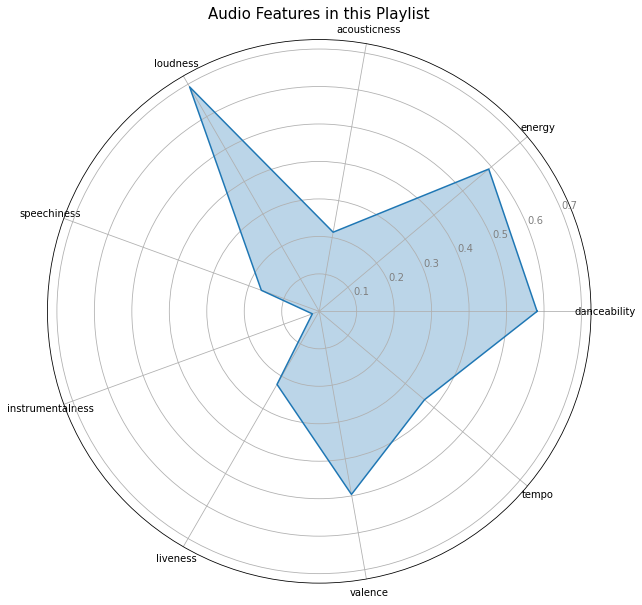

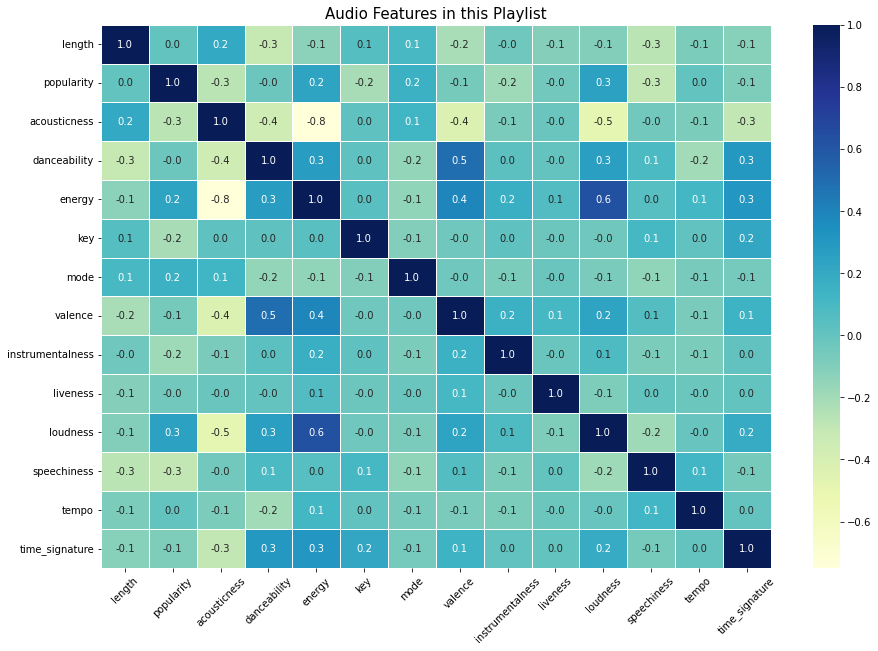

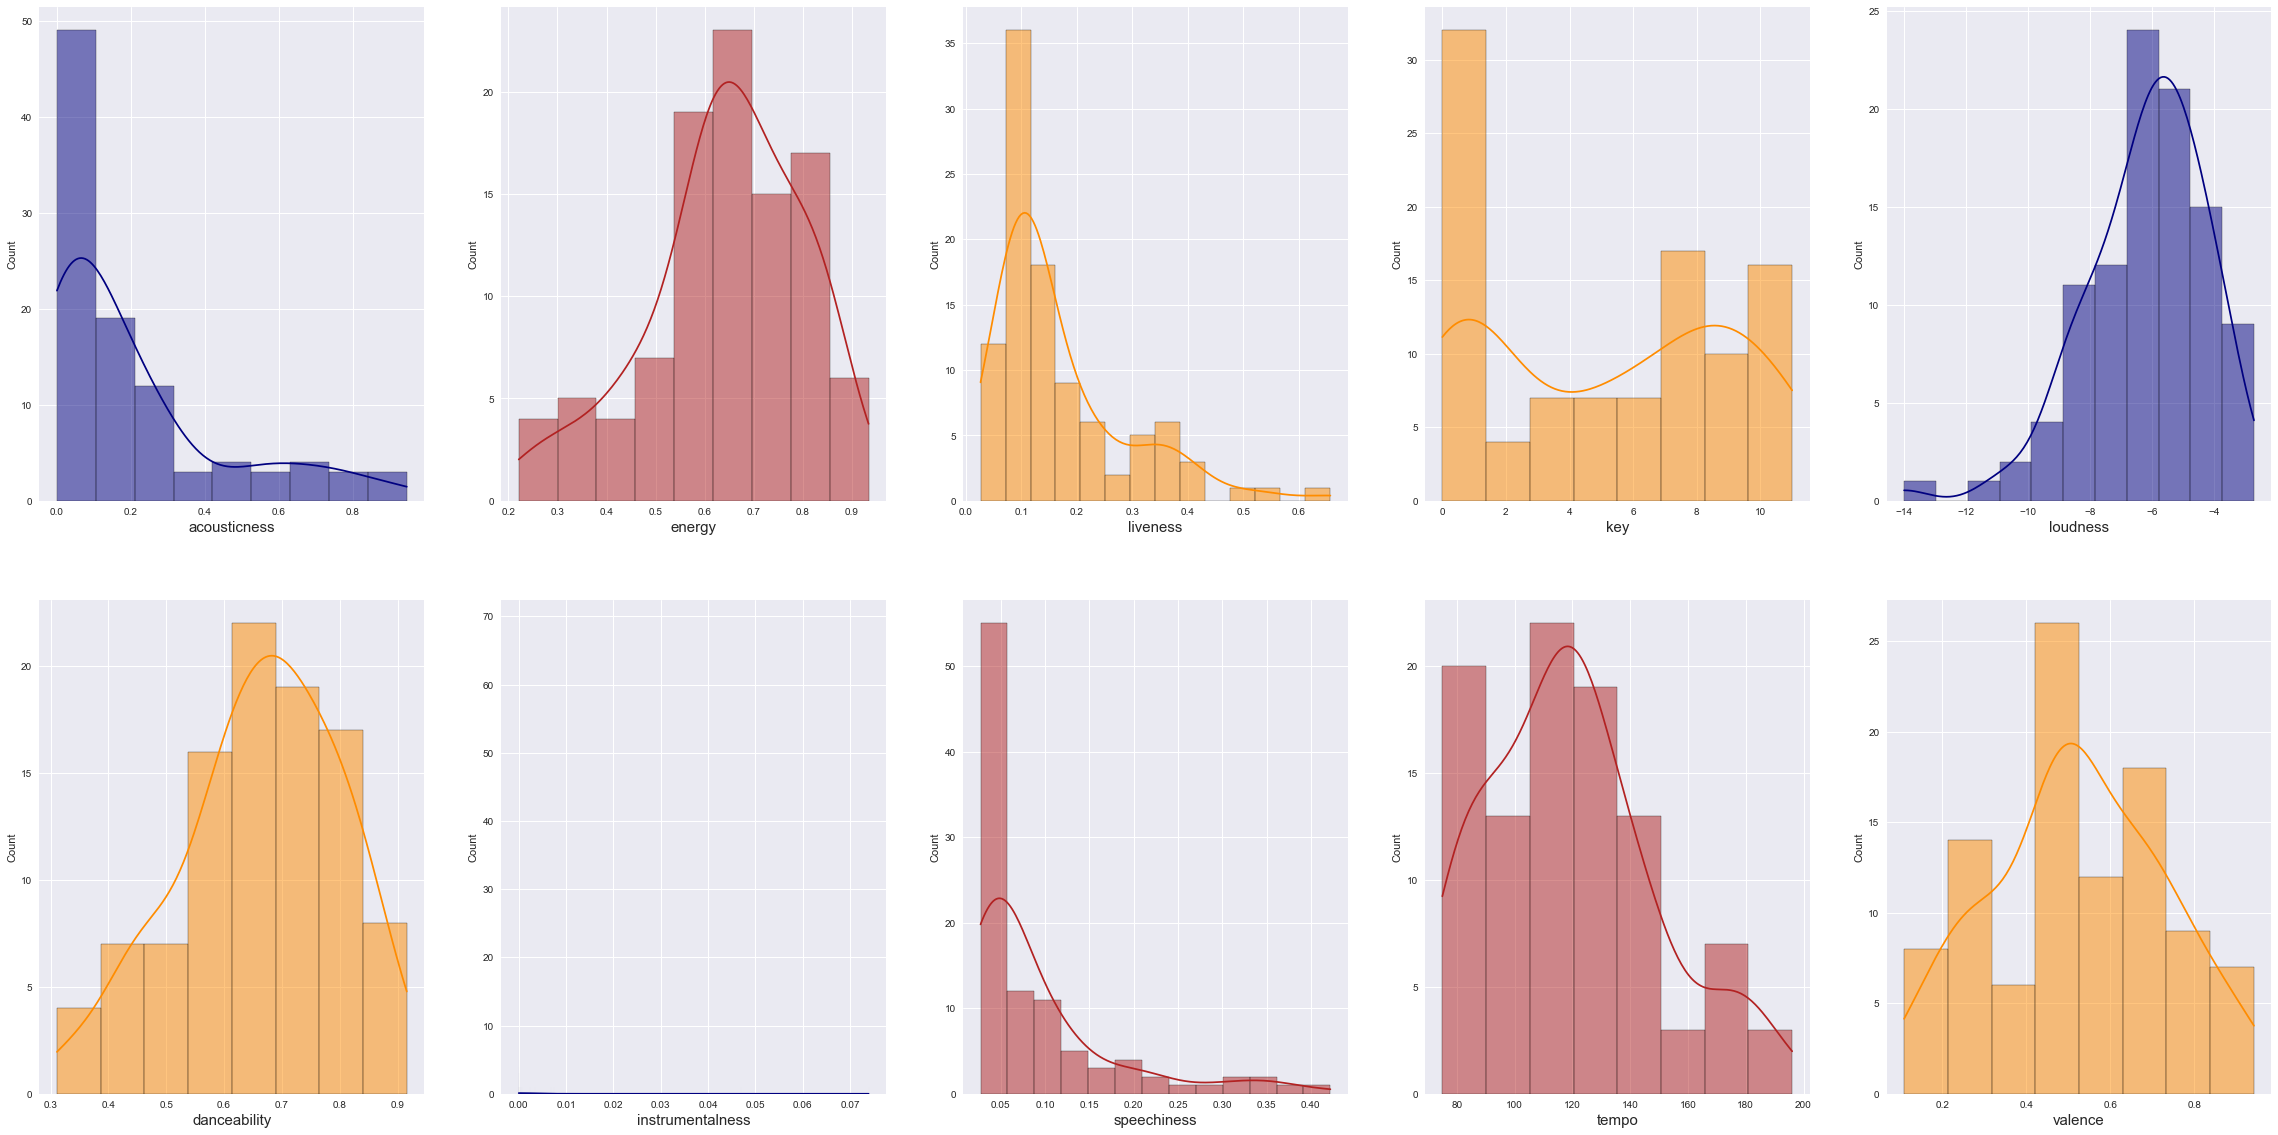

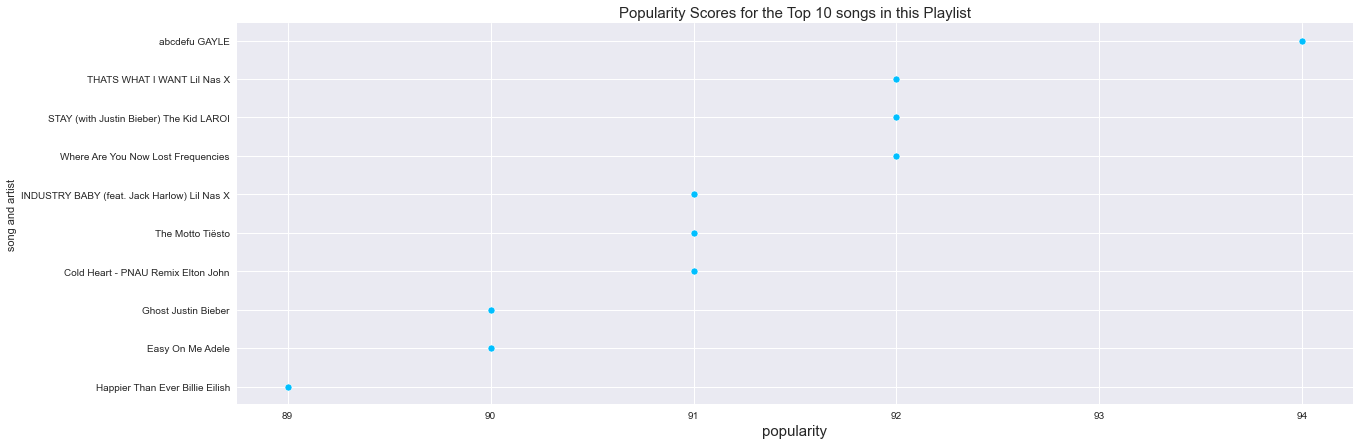

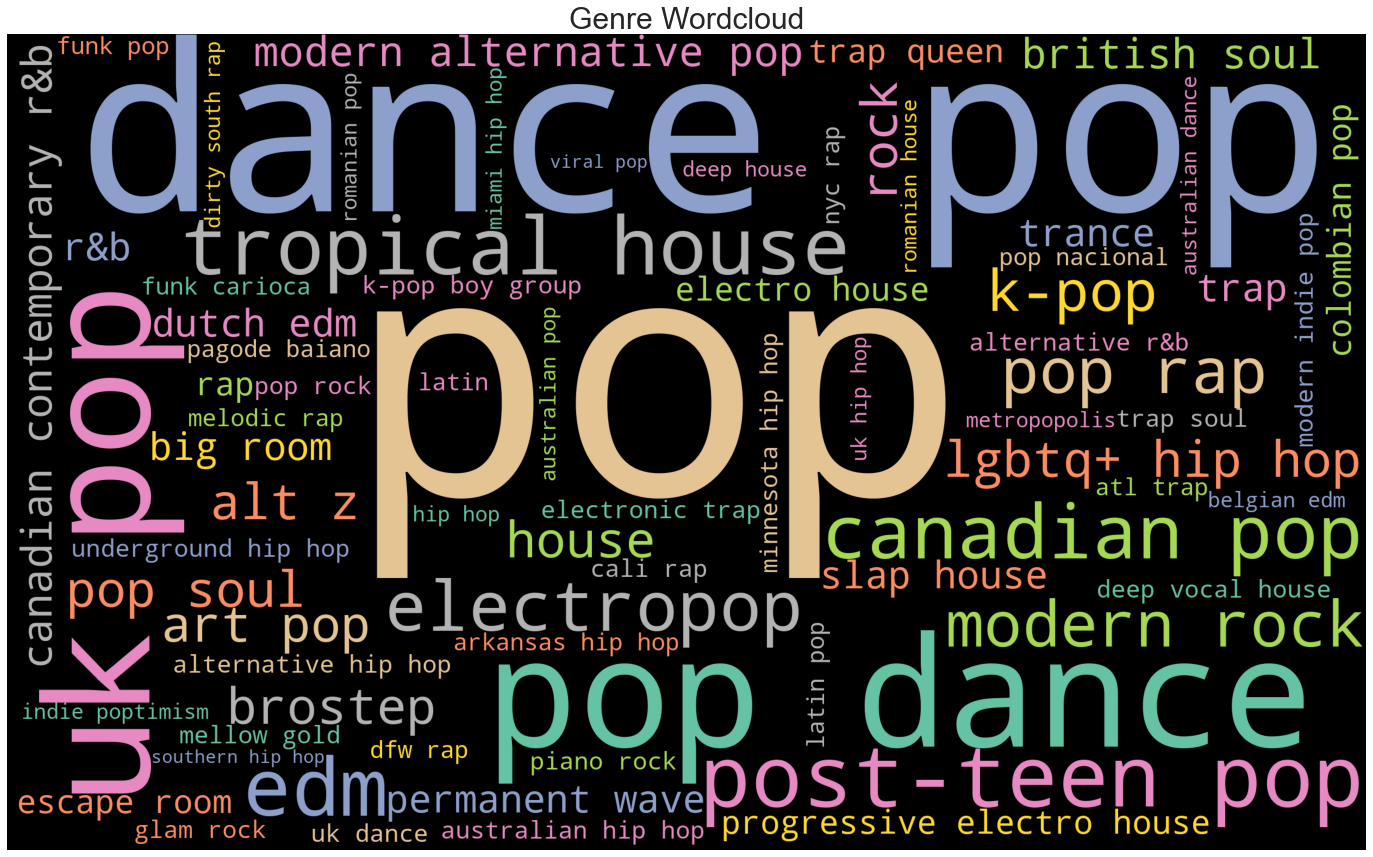

Here is a summary of the genres in this playlist:

Number of genres in the playlist: 76
Average degree: 5.75

The following shows the top 5 genres with the highest degree:
1. Pop, Degree: 45
2. Dance Pop, Degree: 36
3. Pop Dance, Degree: 19
4. Tropical House, Degree: 17
5. Pop Rap, Degree: 16

The following shows the top 5 genres with the highest weighted degree:
1. Pop, Weighted Degree: 142.0
2. Dance Pop, Weighted Degree: 104.0
3. Pop Dance, Weighted Degree: 55.0
4. Edm, Weighted Degree: 48.0
5. Tropical House, Weighted Degree: 43.0

Note: The genre with the highest degree is the most connected genre. In other words, it is associated with a wide variety of genres.

Please review the list below that was previously prepared in the summary
List of songs that are most popular in the playlist:
1. abcdefu, GAYLE
2. THATS WHAT I WANT, Lil Nas X
3. STAY (with Justin Bieber), The Kid LAROI
4. Where Are You Now, Lost Frequencies
5. INDUSTRY BABY (feat. Jack Harlow), Lil Nas X
6. The Motto, Tië

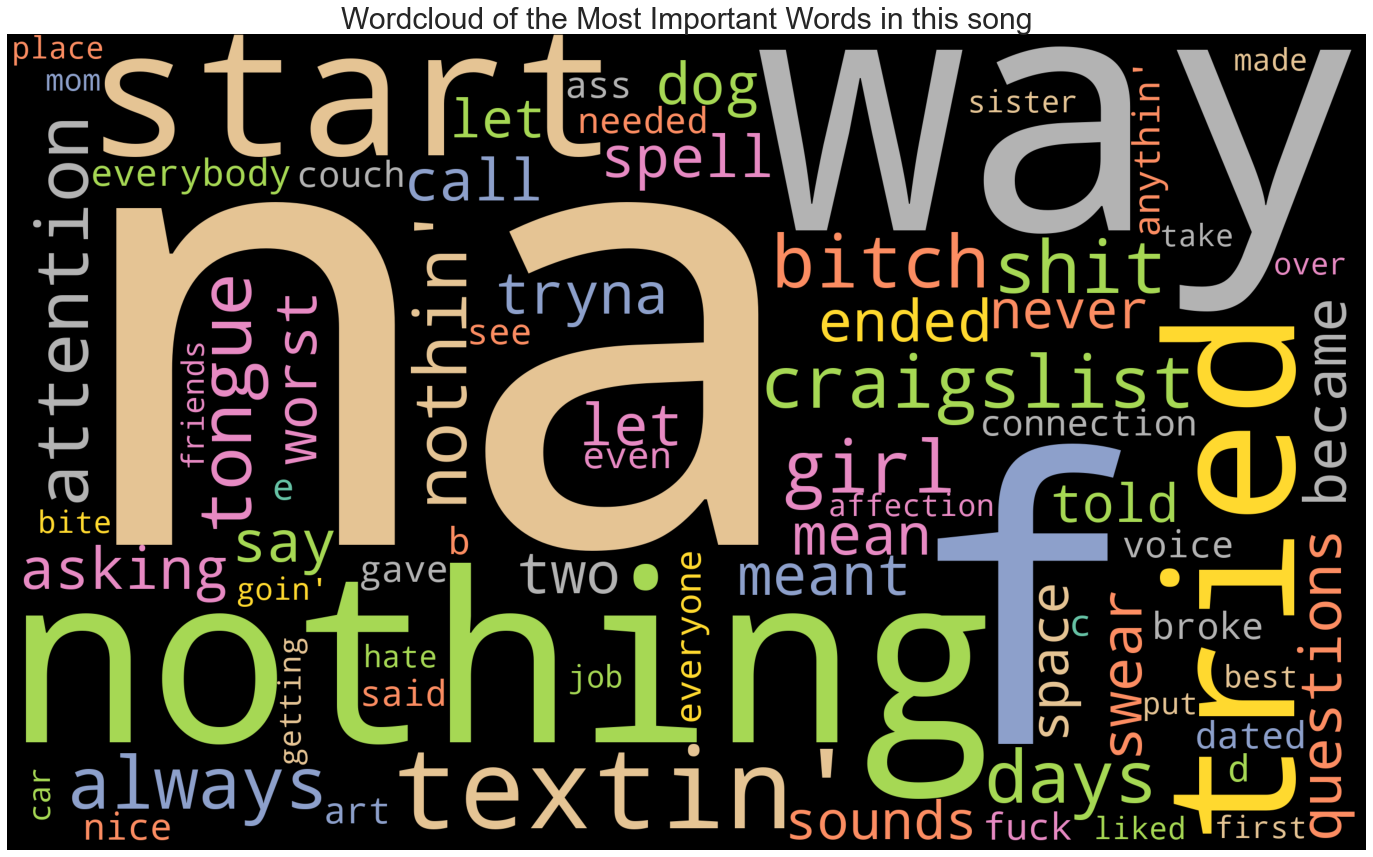


Sentiment Analysis:
Lyrics for this song was rated as 18.7 % Negative.
Lyrics for this song was rated as 63.7 % Neutral.
Lyrics for this song was rated as 17.6 % Positive.

Summary on Wikipedia:

"ABCDEFU" (stylized in all lowercase, also known by its radio edited title "ABC") is the major-label debut single by American singer Gayle, released on August 13, 2021, through Atlantic and Arthouse Records. It was co-written by Gayle with Sara Davis and David Pittenger, and produced by Pete Nappi. The song is the lead single from Gayle's debut EP A Study of the Human Experience Volume One.Commercially, "ABCDEFU" has topped the Billboard Global 200 and peaked at number three on the Billboard Hot 100. Additionally, "ABCDEFU" has topped the charts in Austria, Finland, Germany, Ireland, Israel, Malaysia, Norway, Sweden, Switzerland, and the United Kingdom, coming in number 2 in countries like Australia, Belgium, Lithuania, Poland, and Singapore, while peaking within the top ten of the charts in 

In [13]:
#User Interface

import sys

if __name__ == '__main__':
    while True:
        q1 = input("\nWelcome! Would you like to see a summary of the TOP 100 Songs of 2022 (Best Hit Music Playlist) Spotify playlist? ")
        if q1.lower() == 'no':
            print('\nGoodbye!')
            break
        if q1.lower() == 'yes':
            print("Here is a summary of the playlist")
            visuals.list_of_songs_by_popularity(df)
            visuals.radar_chart(df)
            visuals.heatmap(df)
            visuals.charts(df)
            visuals.dots(df)
            visuals.genres(df)
            visuals.genre_wordcloud(df)
            graphsummary()
            q2 = input("\nWould you like to see the lyrics of the most popular songs in this playlist? ")
            if q2.lower() == 'no':
                continue
            if q2.lower() == 'yes':
                while True:
                    print("\nPlease review the list below that was previously prepared in the summary")
                    display7 = visuals.list_of_songs_by_popularity(df)
                    q3 = input("\nChoose a number for the song lyrics you would like to see. A word cloud showcasing the most common words that appear in the song will be shown. Type 'exit' if you would like to exit. ")
                    a = visuals.for_user_input(df)
                    if q3.lower() == "exit":
                        print("\nGoodbye!")
                        break
                    if int(q3) == 1:
                        print(f"\n")
                        lyrics = chosensong(a[0][0])
                        print(lyrics)
                        most_common_words_wordcloud(a[0][0])
                        sentiment_scores(a[0][0])
                        q4 = input("\nWould you like to see information about this song from Wikipedia? ")
                        if q4.lower() == 'yes':
                            b = visuals.for_user_input(df)
                            x = wiki.summary(b[0][1])
                            print(x)
                            q5 = input("\nWould you like to be directed to the Wikipedia link to explore more information about this song? ")
                            if q5.lower() == 'yes':
                                wiki.url(b[0][1])
                                print("\nPlease review the list below that was previously prepared in the summary")
                                display7 = visuals.list_of_songs_by_popularity(df)
                                continue
                            if q5.lower() == 'no':
                                continue
                        if q4.lower() == 'no':
                            continue
                    if int(q3) == 2:
                        print(f"\n")
                        lyrics = chosensong(a[1][0])
                        print(lyrics)
                        most_common_words_wordcloud(a[1][0])
                        sentiment_scores(a[1][0])
                        q4 = input("\nWould you like to see information about this song from Wikipedia? ")
                        if q4.lower() == 'yes':
                            b = visuals.for_user_input(df)
                            x = wiki.summary(b[1][1])
                            print(x)
                            q5 = input("\nWould you like to be directed to the Wikipedia link to explore more information about this song? ")
                            if q5.lower() == 'yes':
                                wiki.url(b[1][1])
                                print("\nPlease review the list below that was previously prepared in the summary")
                                display7 = visuals.list_of_songs_by_popularity(df)
                                continue
                            if q5.lower() == 'no':
                                continue
                        if q4.lower() == 'no':
                            continue
                    if int(q3) == 3:
                        print(f"\n")
                        lyrics = chosensong(a[2][0])
                        print(lyrics)
                        most_common_words_wordcloud(a[2][0])
                        sentiment_scores(a[2][0])
                        q4 = input("\nWould you like to see information about this song from Wikipedia? ")
                        if q4.lower() == 'yes':
                            b = visuals.for_user_input(df)
                            x = wiki.summary(b[2][1])
                            print(x)
                            q5 = input("\nWould you like to be directed to the Wikipedia link to explore more information about this song? ")
                            if q5.lower() == 'yes':
                                wiki.url(b[2][1])
                                print("\nPlease review the list below that was previously prepared in the summary")
                                display7 = visuals.list_of_songs_by_popularity(df)
                                continue
                            if q5.lower() == 'no':
                                continue
                        if q4.lower() == 'no':
                            continue
                    if int(q3) == 4:
                        print(f"\n")
                        lyrics = chosensong(a[3][0])
                        print(lyrics)
                        most_common_words_wordcloud(a[3][0])
                        sentiment_scores(a[3][0])
                        q4 = input("\nWould you like to see information about this song from Wikipedia? ")
                        if q4.lower() == 'yes':
                            b = visuals.for_user_input(df)
                            x = wiki.summary(b[3][1])
                            print(x)
                            q5 = input("\nWould you like to be directed to the Wikipedia link to explore more information about this song? ")
                            if q5.lower() == 'yes':
                                wiki.url(b[3][1])
                                print("\nPlease review the list below that was previously prepared in the summary")
                                display7 = visuals.list_of_songs_by_popularity(df)
                                continue
                            if q5.lower() == 'no':
                                continue
                        if q4.lower() == 'no':
                            continue
                    if int(q3) == 5:
                        print(f"\n")
                        lyrics = chosensong(a[4][0])
                        print(lyrics)
                        most_common_words_wordcloud(a[4][0])
                        sentiment_scores(a[4][0])
                        q4 = input("\nWould you like to see information about this song from Wikipedia? ")
                        if q4.lower() == 'yes':
                            b = visuals.for_user_input(df)
                            x = wiki.summary(b[4][1])
                            print(x)
                            q5 = input("\nWould you like to be directed to the Wikipedia link to explore more information about this song? ")
                            if q5.lower() == 'yes':
                                wiki.url(b[4][1])
                                print("\nPlease review the list below that was previously prepared in the summary")
                                display7 = visuals.list_of_songs_by_popularity(df)
                                continue
                            if q5.lower() == 'no':
                                continue
                        if q4.lower() == 'no':
                            continue
                    if int(q3) == 6:
                        print(f"\n")
                        lyrics = chosensong(a[5][0])
                        print(lyrics)
                        most_common_words_wordcloud(a[5][0])
                        sentiment_scores(a[5][0])
                        q4 = input("\nWould you like to see information about this song from Wikipedia? ")
                        if q4.lower() == 'yes':
                            b = visuals.for_user_input(df)
                            x = wiki.summary(b[5][1])
                            print(x)
                            q5 = input("\nWould you like to be directed to the Wikipedia link to explore more information about this song? ")
                            if q5.lower() == 'yes':
                                wiki.url(b[5][1])
                                print("\nPlease review the list below that was previously prepared in the summary")
                                display7 = visuals.list_of_songs_by_popularity(df)
                                continue
                            if q5.lower() == 'no':
                                continue
                        if q4.lower() == 'no':
                            continue
                    if int(q3) == 7:
                        print(f"\n")
                        lyrics = chosensong(a[6][0])
                        print(lyrics)
                        most_common_words_wordcloud(a[6][0])
                        sentiment_scores(a[6][0])
                        q4 = input("\nWould you like to see information about this song from Wikipedia? ")
                        if q4.lower() == 'yes':
                            b = visuals.for_user_input(df)
                            x = wiki.summary(b[6][1])
                            print(x)
                            q5 = input("\nWould you like to be directed to the Wikipedia link to explore more information about this song? ")
                            if q5.lower() == 'yes':
                                wiki.url(b[6][1])
                                print("\nPlease review the list below that was previously prepared in the summary")
                                display7 = visuals.list_of_songs_by_popularity(df)
                                continue
                            if q5.lower() == 'no':
                                continue
                        if q4.lower() == 'no':
                            continue
                    if int(q3) == 8:
                        print(f"\n")
                        lyrics = chosensong(a[7][0])
                        print(lyrics)
                        most_common_words_wordcloud(a[7][0])
                        sentiment_scores(a[7][0])
                        q4 = input("\nWould you like to see information about this song from Wikipedia? ")
                        if q4.lower() == 'yes':
                            b = visuals.for_user_input(df)
                            x = wiki.summary(b[7][1])
                            print(x)
                            q5 = input("\nWould you like to be directed to the Wikipedia link to explore more information about this song? ")
                            if q5.lower() == 'yes':
                                wiki.url(b[7][1])
                                print("\nPlease review the list below that was previously prepared in the summary")
                                display7 = visuals.list_of_songs_by_popularity(df)
                                continue
                            if q5.lower() == 'no':
                                continue
                        if q4.lower() == 'no':
                            continue
                    if int(q3) == 9:
                        print(f"\n")
                        lyrics = chosensong(a[8][0])
                        print(lyrics)
                        most_common_words_wordcloud(a[8][0])
                        sentiment_scores(a[8][0])
                        q4 = input("\nWould you like to see information about this song from Wikipedia? ")
                        if q4.lower() == 'yes':
                            b = visuals.for_user_input(df)
                            x = wiki.summary(b[8][1])
                            print(x)
                            q5 = input("\nWould you like to be directed to the Wikipedia link to explore more information about this song? ")
                            if q5.lower() == 'yes':
                                wiki.url(b[8][1])
                                print("\nPlease review the list below that was previously prepared in the summary")
                                display7 = visuals.list_of_songs_by_popularity(df)
                                continue
                            if q5.lower() == 'no':
                                continue
                        if q4.lower() == 'no':
                            continue
                    if int(q3) == 10:
                        print(f"\n")
                        lyrics = chosensong(a[9][0])
                        print(lyrics)
                        most_common_words_wordcloud(a[9][0])
                        sentiment_scores(a[9][0])
                        q4 = input("\nWould you like to see information about this song from Wikipedia? ")
                        if q4.lower() == 'yes':
                            b = visuals.for_user_input(df)
                            x = wiki.summary(b[9][1])
                            print(x)
                            q5 = input("\nWould you like to be directed to the Wikipedia link to explore more information about this song? ")
                            if q5.lower() == 'yes':
                                wiki.url(b[9][1])
                                print("\nPlease review the list below that was previously prepared in the summary")
                                display7 = visuals.list_of_songs_by_popularity(df)
                                continue
                            if q5.lower() == 'no':
                                continue
                        if q4.lower() == 'no':
                            continue
                        break
                    break
                break
            break